# **Reflectance Performance of the W-coat on a Glass Substrate**


This notebook demonstrates how to calculate the reflectance of a multilayer thin film stack (W-coat) deposited on a glass substrate. The calculation is performed for two types of polarizations, s-polarization and p-polarization, over a wavelength range of 500 nm to 700 nm and incident angles from 0° to 70°.

---

## **Introduction**

We will use the Transfer Matrix Method (TMM) to analyze the reflection behavior of this multilayer thin film. The W-coat consists of two layers made from Magnesium Fluoride (MgF₂) and Yttrium Oxide (Y₂O₃). These layers are stacked on a glass substrate (Silicon Dioxide, SiO₂), and the incident medium is air.

![title](stack_of_w_coat.png)

In this example, the calculation is done for two polarizations:
- **s-polarization**: Electric field perpendicular to the plane of incidence.
- **p-polarization**: Electric field parallel to the plane of incidence.

We will calculate the reflectance as a function of wavelength and angle of incidence for each polarization.

---

## **Materials and Layer Thickness**

We are considering the following material stack:

- **Air** as the incident medium.
- **MgF₂ (Magnesium Fluoride)** with a thickness of 93 nm.
- **Y₂O₃ (Yttrium Oxide)** with a thickness of 63 nm.
- **SiO₂ (Silicon Dioxide)** as the substrate.

These materials are well-suited for anti-reflection coatings and optical filters due to their refractive indices.

---

## **Python Implementation**

In this section, we implement the TMM algorithm using the `tmmax` library, which is designed for high-performance multilayer simulations with vectorized operations using the `jax` library.

In [3]:
import jax.numpy as jnp
from tmmax.tmm import tmm

# Define the materials and their thicknesses
material_list =  ["Air", "MgF2", "Y2O3", "SiO2"]
thickness_list = jnp.array([93e-9, 63e-9])

# Define the wavelength range (500 nm to 700 nm) and angles of incidence (0° to 70°)
wavelength_arr = jnp.linspace(500e-9, 700e-9, 1000)
angle_of_incidences = jnp.linspace(0, (70*jnp.pi/180), 1000)

# Calculate reflectance for s-polarization
result_s = tmm(material_list=material_list, thickness_list=thickness_list,
             wavelength_arr=wavelength_arr, angle_of_incidences=angle_of_incidences,
             polarization="s")

# Calculate reflectance for p-polarization
result_p = tmm(material_list=material_list, thickness_list=thickness_list,
             wavelength_arr=wavelength_arr, angle_of_incidences=angle_of_incidences,
             polarization="p")

/usr/local/lib/python3.10/dist-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(out, dtype, weak_type)
/usr/local/lib/python3.10/dist-packages/jax/_src/ops/scatter.py:96: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=float32 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/jax/_src/ops/scatter.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return lax_internal._convert_element_type(o

## **Visualization of Results**

We will now visualize the reflectance for both s-polarization and p-polarization as a function of wavelength and angle of incidence. The color map will represent the reflectance percentage.

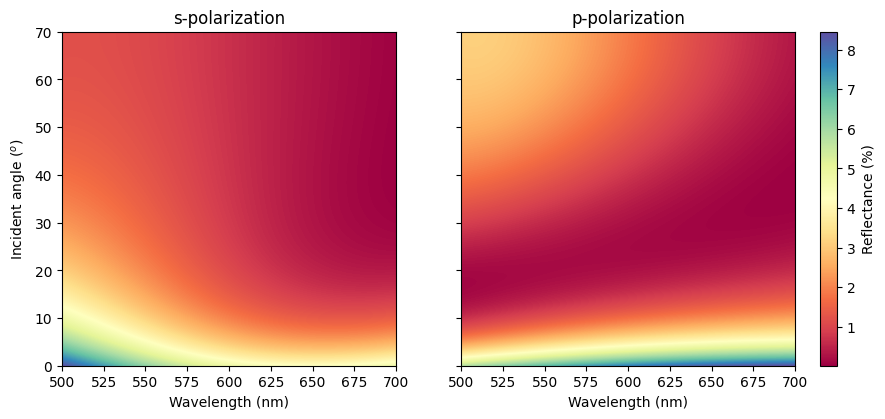

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,2),
                 axes_pad=0.65,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.25,
                 )

# Add data to image grid
i = 0
for ax in grid:
    if i == 0:
        im = ax.imshow(result_s[0]*100, cmap='Spectral', aspect=200/70,extent = [500, 700, 0, 70])
        ax.set_title("s-polarization")
    if i ==1:
        im = ax.imshow(result_p[0]*100, cmap='Spectral', aspect=200/70,extent = [500, 700, 0, 70])
        ax.set_title("p-polarization")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Incident angle ($^o$)")
    i += 1

# Colorbar
ax.cax.colorbar(im, label='Reflectance (%)')
ax.cax.toggle_label(True)

plt.savefig("w_coat_reflectance_s_p.png", dpi=600)
plt.show()

### **Discussion of Reflectance Results**



#### **s-Polarization**
The first heatmap (on the left) represents the reflectance of the thin-film stack for **s-polarized light** (electric field perpendicular to the plane of incidence). The key observations from this plot include:

- **Reflectance Trends**:
  - At lower wavelengths (~500 nm), the reflectance is higher for near-normal incidence (small angles) and gradually decreases as the angle of incidence increases. This is visually apparent by the transition from a light green at the lower left corner to darker colors at higher angles.
  - For wavelengths above ~550 nm, the reflectance remains relatively low across all angles of incidence. This is indicated by the uniformity in the darker red and purple regions of the heatmap.
  
- **Angle Dependence**:
  - As the angle increases, the reflectance generally rises for wavelengths below ~600 nm. This behavior can be seen in the color gradient from the blue/green regions at small angles to the red/maroon shades at higher angles.
  - The most significant variation occurs for wavelengths in the range of 500-525 nm, where a sharp color transition occurs, indicating higher reflectance at lower wavelengths.

#### **p-Polarization**
The second heatmap (on the right) shows the reflectance for **p-polarized light** (electric field parallel to the plane of incidence). The trends for p-polarization differ from those of s-polarization in several ways:

- **Reflectance Trends**:
  - Similar to s-polarization, the reflectance is higher at shorter wavelengths and for near-normal incidence. However, p-polarization shows a slightly higher overall reflectance in the shorter wavelength region (500-525 nm), as seen in the more pronounced blue and green regions.
  - Above ~600 nm, the reflectance remains consistently low across the entire angle range, much like in s-polarization, which is reflected in the red-to-maroon shading.

- **Angle Dependence**:
  - For p-polarized light, the reflectance behavior at small angles and shorter wavelengths (500-525 nm) shows a slightly steeper rise compared to s-polarization. The blue-to-green transition occurs at smaller angles in this case, indicating a more pronounced increase in reflectance at these angles.
  - As the angle approaches 70°, the reflectance tends to stabilize and reduce, particularly for longer wavelengths.

#### **Comparison of s- and p-Polarization Reflectance**
- At **shorter wavelengths (500-525 nm)**, both s- and p-polarization reflectance exhibit higher values at normal incidence and increase with the angle of incidence. However, p-polarization shows a steeper increase compared to s-polarization at these wavelengths.
- For **wavelengths above ~600 nm**, the reflectance remains consistently low for both polarizations across all angles of incidence, though the p-polarization shows marginally higher values at lower angles.
